C:\Users\lequa\AppData\Local\Temp\ipykernel_15628\2053810068.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_main, x='status', palette='pastel')


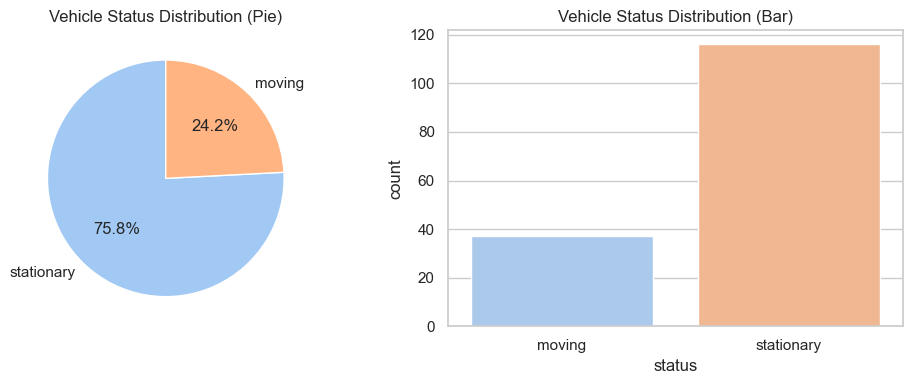

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# ===== 1. Load and prepare data =====
data_main = pd.read_csv('../data/tracking_results.csv', parse_dates=['date'])
data_count = pd.read_csv('../data/vehicle_count.csv', parse_dates=['date'])

# Extract date only for time groupings
data_main['date_only'] = data_main['date'].dt.date
data_count['date_only'] = data_count['date'].dt.date

# ===== 2. Vehicle Status Distribution (Pie and Bar) =====
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
data_main['status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Vehicle Status Distribution (Pie)')
plt.ylabel('')

plt.subplot(1, 2, 2)
sns.countplot(data=data_main, x='status', palette='pastel')
plt.title('Vehicle Status Distribution (Bar)')
plt.tight_layout()
plt.show()

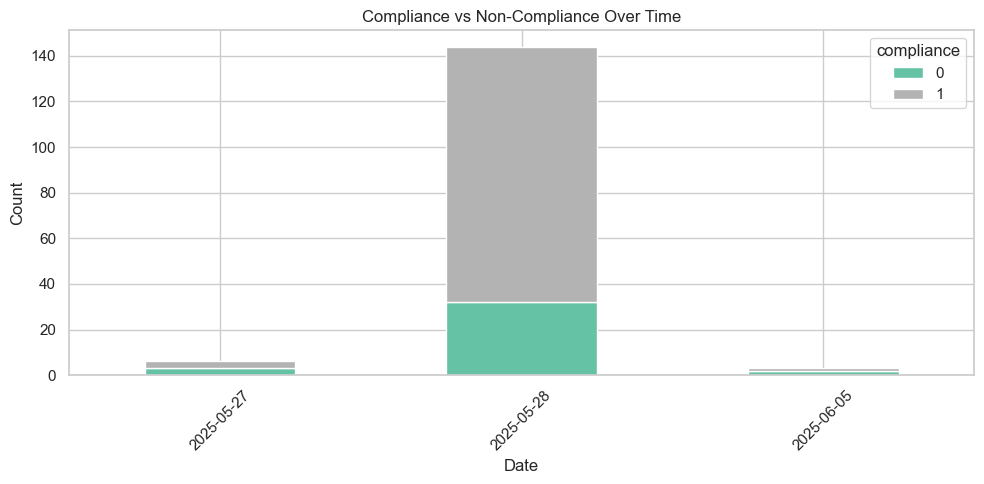

In [3]:
compliance_over_time = data_main.groupby(['date_only', 'compliance']).size().unstack().fillna(0)
compliance_over_time.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='Set2')
plt.title('Compliance vs Non-Compliance Over Time')
plt.ylabel('Count')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

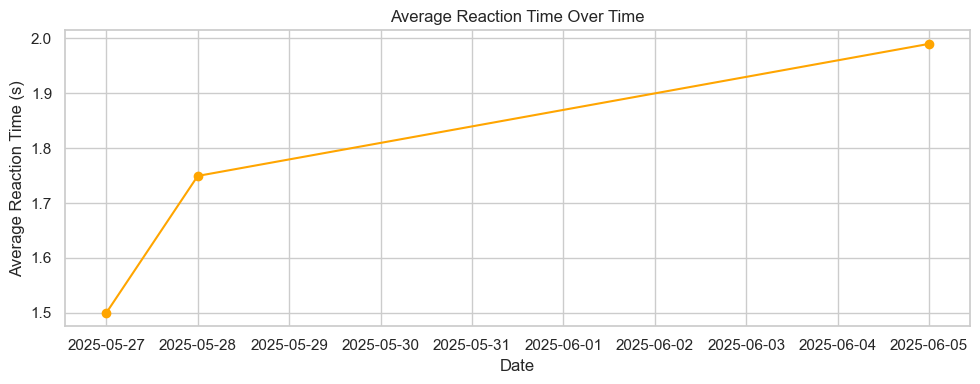

In [4]:
avg_reaction_time = data_main.groupby('date_only')['reaction_time'].mean()
avg_reaction_time.plot(kind='line', marker='o', figsize=(10, 4), color='orange')
plt.title('Average Reaction Time Over Time')
plt.ylabel('Average Reaction Time (s)')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\lequa\AppData\Local\Temp\ipykernel_7996\1279474699.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_main, x='vehicle_type', y='reaction_time', palette='Set3')


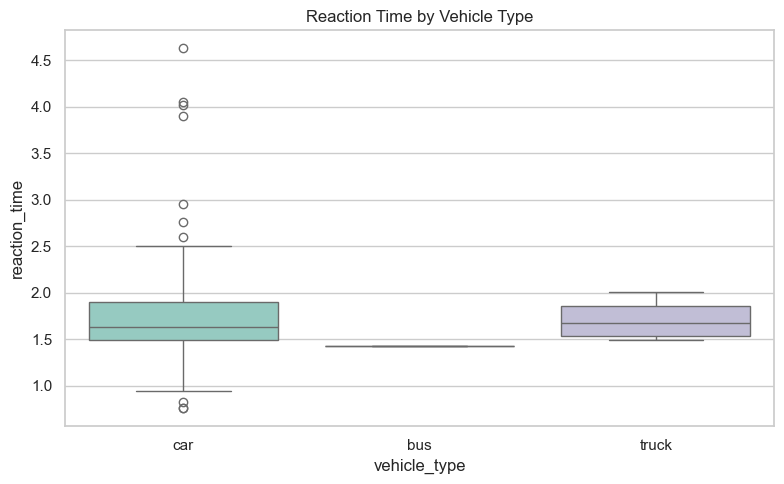

In [5]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data_main, x='vehicle_type', y='reaction_time', palette='Set3')
plt.title('Reaction Time by Vehicle Type')
plt.tight_layout()
plt.show()

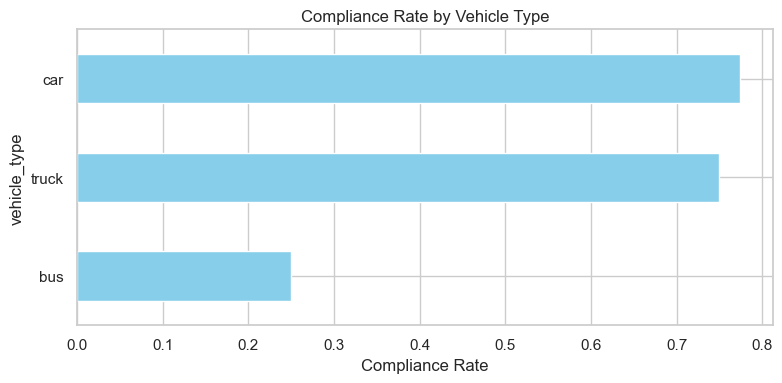

In [6]:
compliance_rate = data_main.groupby('vehicle_type')['compliance'].mean().sort_values()
compliance_rate.plot(kind='barh', color='skyblue', figsize=(8, 4))
plt.title('Compliance Rate by Vehicle Type')
plt.xlabel('Compliance Rate')
plt.tight_layout()
plt.show()

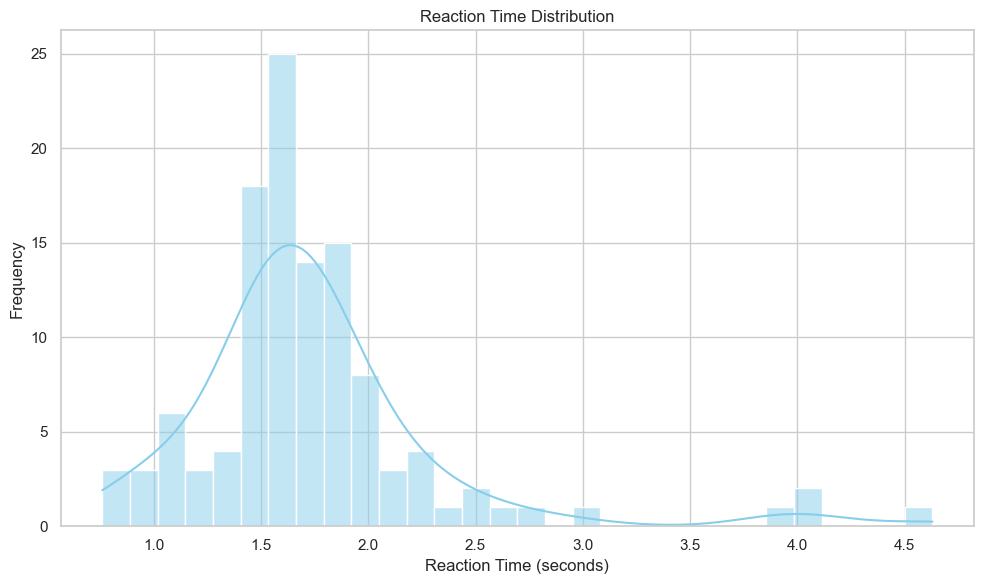

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_main, x='reaction_time', bins=30, kde=True, color='skyblue')
plt.title('Reaction Time Distribution')
plt.xlabel('Reaction Time (seconds)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

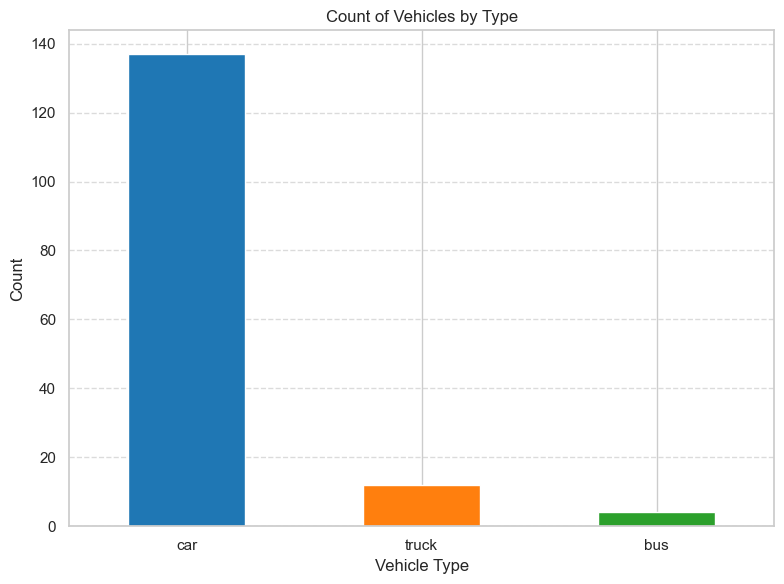

In [5]:
vehicle_counts = data_main['vehicle_type'].value_counts()

plt.figure(figsize=(8, 6))
vehicle_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Count of Vehicles by Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

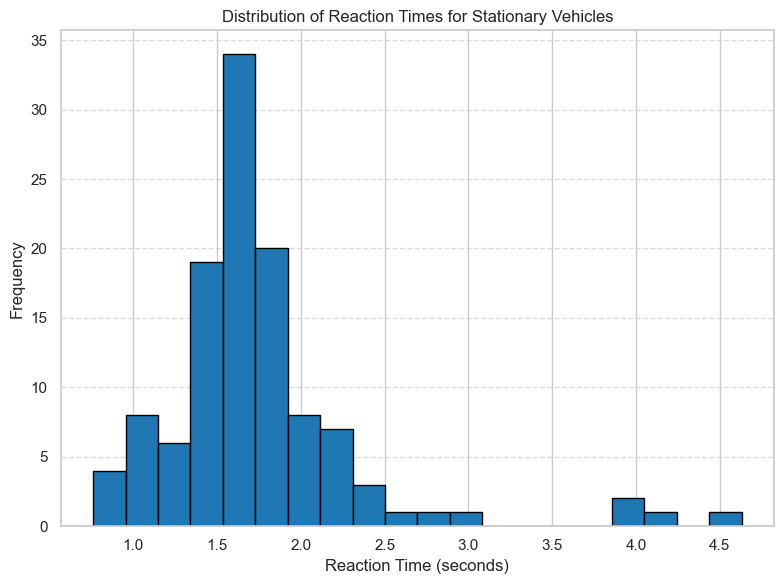

In [6]:
stationary_data = data_main[data_main['status'] == 'stationary']['reaction_time'].dropna()

plt.figure(figsize=(8, 6))
plt.hist(stationary_data, bins=20, color='#1f77b4', edgecolor='black')
plt.title('Distribution of Reaction Times for Stationary Vehicles')
plt.xlabel('Reaction Time (seconds)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()